In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [36]:

# Load datasets
train = pd.read_csv('C:\\Users\\shing\\anaconda_projects\\Dmart sales analysis\\test (1).csv')
test = pd.read_csv('C:\\Users\\shing\\anaconda_projects\\Dmart sales analysis\\train (1).csv')
print(train.head())
print(test.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket 

In [37]:
import pandas as pd
train_df = pd.read_csv('C:\\Users\\shing\\anaconda_projects\\Dmart sales analysis\\train (1).csv')
train_df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [38]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [39]:
imputer = SimpleImputer(strategy='mean')
train_df['Item_Weight'] = imputer.fit_transform(train_df[['Item_Weight']])
train_df['Outlet_Size'].fillna('Unknown', inplace=True)
train_df.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

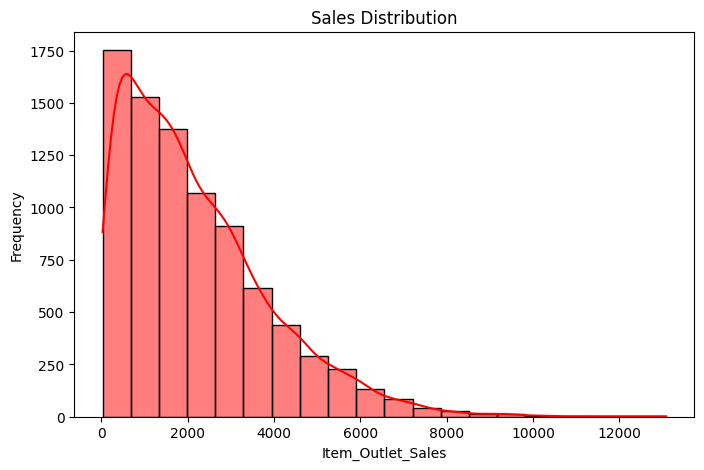

In [47]:

plt.figure(figsize=(8,5))
sns.histplot(train_df['Item_Outlet_Sales'], bins=20, kde=True, color='red')
plt.title('Sales Distribution')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.show()


In [41]:

encoder = LabelEncoder()
categorical_cols = ['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for col in categorical_cols:
    train_df[col] = encoder.fit_transform(train_df[col])


In [42]:
X = train_df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Item_Type'])
y = train_df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,1,0.016047,249.8092,9,1999,1,0,1
1,5.92,2,0.019278,48.2692,3,2009,1,2,2
2,17.50,1,0.016760,141.6180,9,1999,1,0,1
3,19.20,2,0.000000,182.0950,0,1998,3,2,0
4,8.93,1,0.000000,53.8614,1,1987,0,2,1


In [43]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, R2: {r2_lr}')


Linear Regression - MAE: 855.6716560620315, MSE: 1303803.7628428189, R2: 0.5203023834380307


In [44]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, R2: {r2_rf}')


Random Forest - MAE: 766.2162176340175, MSE: 1197936.9955658098, R2: 0.5592530579054613
